# CUSTOMER SALES ANALYSIS REPORT

## IMPORT & LOAD DATA

In [103]:
import pandas as pd

In [104]:
sales_df=pd.read_csv("C:/Users/Hp/Downloads/sales_data (2).csv")

In [105]:
sales_df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [106]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [107]:
sales_df.shape

(100, 7)

In [108]:
customers_df=pd.read_csv("C:/Users/Hp/Downloads/customer_churn.csv")

In [109]:
customers_df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [110]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [111]:
customers_df.shape

(500, 9)

In [112]:
sales_df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [113]:
customers_df.isnull().sum()

CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [114]:
sales_df.duplicated().sum()

np.int64(0)

In [115]:
customers_df.duplicated().sum()

np.int64(0)

## DATE PREPARATION (REQUIRED)

In [116]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [117]:
sales_df['Date'].dtype

dtype('<M8[ns]')

In [118]:
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Year'] = sales_df['Date'].dt.year

## CUSTOMER ANALYSIS

### Merge not possible Due to inconsistent customer identifiers across datasets, customer-level sales linkage was limited. Therefore, sales trend analysis and customer demographic analysis were performed independently.

## SALES PATTERN ANALYSIS

In [133]:
#Monthly Sales (Trend Data)
monthly_sales = (
    sales_df
    .groupby('Month')['Total_Sales']
    .sum()
    .sort_index()
)

monthly_sales

Month
1    4120524
2    2656050
3    4485006
4    1103468
Name: Total_Sales, dtype: int64

In [134]:
#Product Performance
product_sales = (
    sales_df
    .groupby('Product')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
)

product_sales.head(10)

Product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: Total_Sales, dtype: int64

## PIVOT TABLES + VISUALS

In [136]:
#Monthly Order Pivot
monthly_orders = (
    sales_df
    .groupby('Month')
    .size()
)

monthly_orders

Month
1    31
2    29
3    31
4     9
dtype: int64

In [139]:
#PMonthly Sales Pivot
monthly_sales_pivot = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Month',
    aggfunc='sum'
)

monthly_sales_pivot

,Total_Sales
Month,
1,4120524
2,2656050
3,4485006
4,1103468


In [140]:
#Product Sales Pivot
product_sales_pivot = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Product',
    aggfunc='sum'
).sort_values(by='Total_Sales', ascending=False)

product_sales_pivot

,Total_Sales
Product,
Laptop,3889210
Tablet,2884340
Phone,2859394
Headphones,1384033
Monitor,1348071


In [141]:
month_product_pivot = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Month',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

month_product_pivot

Product,Headphones,Laptop,Monitor,Phone,Tablet
Month,,,,,
1,241498,1981281,67662,937670,892413
2,73396,285064,772321,838792,686477
3,687734,1522863,477371,1082932,714106
4,381405,100002,30717,0,591344


### Line Chart – Monthly Sales Trend

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

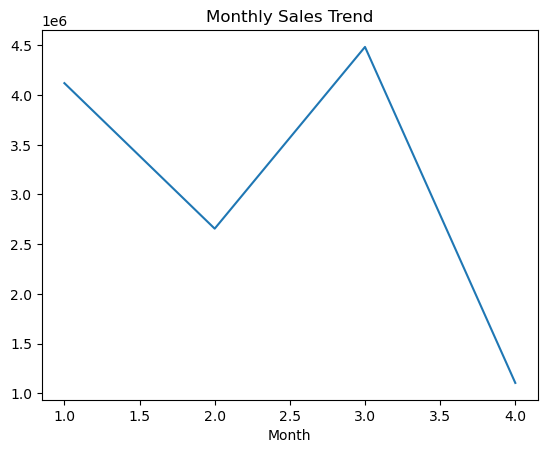

In [130]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')

In [142]:
#This line chart shows monthly sales trends, helping identify growth or seasonal patterns.

### Bar Chart – Product Sales

<Axes: title={'center': 'Total Sales by Product'}, xlabel='Product'>

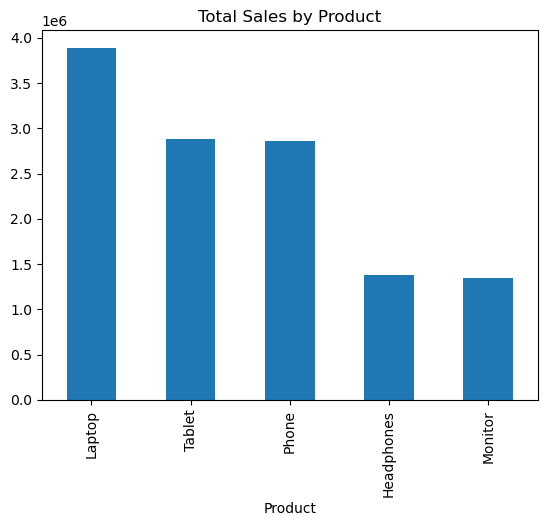

In [131]:
product_sales.plot(kind='bar', title='Total Sales by Product')

In [144]:
#This bar chart compares total revenue generated by each product.

### Pie Chart – Top 5 Products

<Axes: title={'center': 'Top 5 Products Contribution'}, ylabel='Total_Sales'>

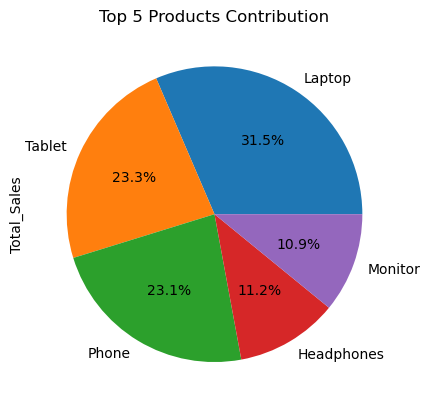

In [132]:
product_sales.head(5).plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Top 5 Products Contribution'
)

In [145]:
#This pie chart shows percentage contribution of top products to total sales.